DAY2
# 目的

日本の気温上昇は世界の平均より早い速度で上昇しており、100 年あたり 1.19°Cの割合で上昇している。21世紀末には、RCP2.6 シナリオで 0.5~1.7°C、RCP8.5 シナリオ（※１）で 3.4~5.4°C上昇すると予測されている。
今後とも気温上昇が見込まれる中で、<FONT COLOR="RED">暑さ指数（WBGT）（※２）の構成要素である気温、風速、全天日射量、湿度を計測可能なデータとし、基本的な手法を用いて日射病予防となるような異常気象を検出する。</FONT>

※１）IPCC（気候変動に関する政府間パネル: Intergovernmental Panel on Climate Change）では政策的な緩和策を前提として、 将来、温室効果ガスをどのような濃度に安定化させるかという考え方から、その「代表的濃度経路 (Representative Concentration Pathways　：RCP40、以下「RCP」という)」を示している。

※２）熱中症に関連する、気温、湿度、日射・輻射 、風の要素を積極的に取り入れた指標とし て、暑さ指数(WBGT:Wet Bulb Globe Temperature:湿球黒球温度)があり、特に 高温環境の指標として労 働や運動時の予防措置に用いられている。

# 全国の気温、風速、全天日射量、湿度を概観

In [41]:
import numpy as np
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix

import statsmodels.api as sm  #ARMAで予測する際に用いるライブラリ
from scipy.ndimage.interpolation import shift #numpyの配列をshiftするための関数
import scipy

#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import Imputer

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
mpl.__version__

'2.0.2'

In [43]:
#　データの読み込み

In [44]:
df2018 = pd.read_excel('data/hot/zenkoku2018.xlsx', sheet_name='Sheet1')

In [45]:
df2017 = pd.read_excel('data/hot/zenkoku2017.xlsx', sheet_name='Sheet1')

In [46]:
df2016 = pd.read_excel('data/hot/zenkoku2016.xlsx', sheet_name='Sheet1')

In [47]:
print(df2018.shape)
print(df2017.shape)
print(df2016.shape)

(75072, 6)
(75072, 6)
(75072, 6)


In [48]:
print(df2018.columns)
print(df2017.columns)
print(df2016.columns)

Index(['place', 'time', 'temp', 'wind_speed', 'solar_radiation',
       'relative_humidity'],
      dtype='object')
Index(['place', 'time', 'temp', 'wind_speed', 'solar_radiation',
       'relative_humidity'],
      dtype='object')
Index(['place', 'time', 'temp', 'wind_speed', 'solar_radiation',
       'relative_humidity'],
      dtype='object')


0温度（℃）    temperature
1風力（m/s）  wind speed
2風向   wind direction
3全天日射量  (kW/m2) square of solar radiation
4湿度（％）  relative humidity

In [49]:
# データを取得した地点（４データが揃っているため）

pref = df2018["place"].unique()
print(pref)
pref.size

['akita' 'aomori' 'fukui' 'fukuoka' 'fukusima' 'hikone' 'kagosima' 'kochi'
 'kofu' 'kumamoto' 'maebasi' 'matue' 'matuyama' 'miyazaki' 'morioka'
 'nagano' 'nagasaki' 'nagoya' 'naha' 'nara' 'niigata' 'oita' 'osaka'
 'saga' 'sapporo' 'sendai' 'simoseki' 'sizuoka' 'takamatu' 'tokyo'
 'toyama' 'tukuba' 'utsunomiya' 'yamagata']


34

In [50]:
# データ概要　＠３４地点

display(df2016.describe())
display(df2017.describe())
display(df2018.describe())

temp    wind_speed  solar_radiation  relative_humidity
count  75068.000000  75030.000000     75039.000000       74976.000000
mean      25.899069      2.570706         0.698315          76.372399
std        3.828286      1.628893         0.986752          14.026653
min        9.500000      0.000000         0.000000          19.000000
25%       23.400000      1.400000         0.000000          67.000000
50%       25.900000      2.200000         0.090000          78.000000
75%       28.500000      3.400000         1.190000          88.000000
max       37.800000     24.400000         3.720000         100.000000

temp    wind_speed  solar_radiation  relative_humidity
count  75070.000000  75056.000000     75060.000000       75012.000000
mean      25.595203      2.652606         0.690912          76.035288
std        4.172677      1.696442         0.970914          14.212094
min        4.900000      0.000000         0.000000          22.000000
25%       22.800000      1.400000         0.000000          66.000000
50%       25.900000      2.300000         0.100000          77.000000
75%       28.500000      3.500000         1.180000          87.000000
max       37.000000     17.600000         3.920000         100.000000

temp    wind_speed  solar_radiation  relative_humidity
count  75069.000000  75067.000000     75071.000000       75002.000000
mean      26.089961      2.793271         0.707898          76.164289
std        4.475580      1.913142         0.999807          14.717342
min        9.900000      0.000000         0.000000          18.000000
25%       23.200000      1.500000         0.000000          66.000000
50%       26.400000      2.300000         0.100000          78.000000
75%       29.100000      3.700000         1.210000          88.000000
max       40.200000     31.500000         3.810000         100.000000

In [51]:
# 欠損値＠東京、名古屋、大阪

display(df2016[df2016['place']==('tokyo'or'nagoya'or'osaka')].isnull().sum())
display(df2017[df2017['place']==('tokyo'or'nagoya'or'osaka')].isnull().sum())
display(df2018[df2018['place']==('tokyo'or'nagoya'or'osaka')].isnull().sum())

place                0
time                 0
temp                 0
wind_speed           0
solar_radiation      0
relative_humidity    0
dtype: int64

place                 0
time                  0
temp                  0
wind_speed           10
solar_radiation      10
relative_humidity     0
dtype: int64

place                0
time                 0
temp                 0
wind_speed           0
solar_radiation      0
relative_humidity    0
dtype: int64

## 地域別

### 気温

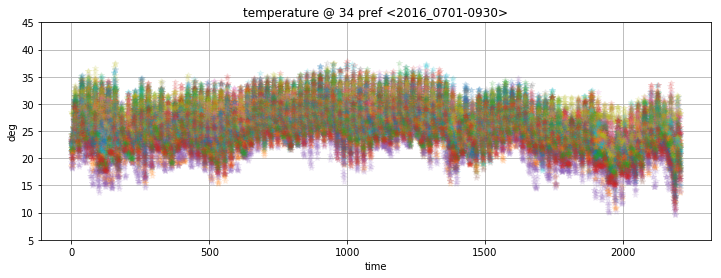

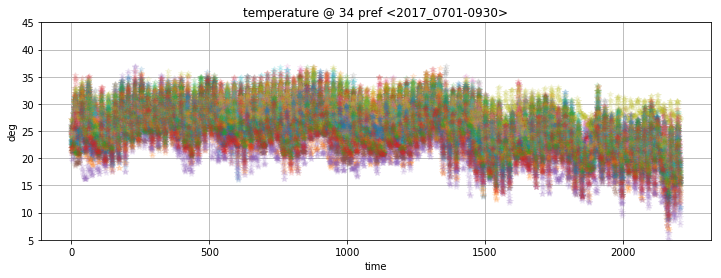

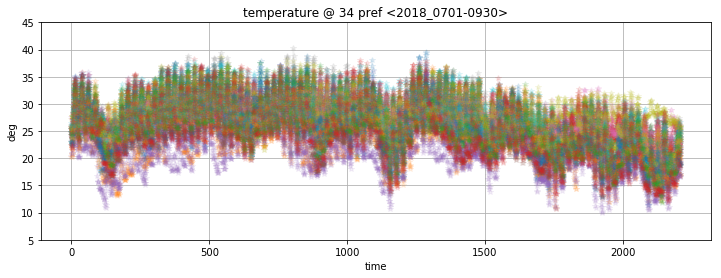

In [52]:
x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([5,45])
plt.ylabel('deg')
plt.xlabel('time')
plt.grid()
for i in pref:
    plt.plot(x,df2016[df2016['place']==i].loc[:,'temp'], marker="*", ls="-",label=i,alpha=0.1)
plt.title('temperature @ 34 pref <2016_0701-0930>')
plt.show()

x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([5,45])
plt.ylabel('deg')
plt.xlabel('time')
plt.grid()
for i in pref:
    plt.plot(x,df2017[df2017['place']==i].loc[:,'temp'], marker="*", ls="-",label=i,alpha=0.1)
plt.title('temperature @ 34 pref <2017_0701-0930>')
plt.show()

x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([5,45])
plt.ylabel('deg')
plt.xlabel('time')
plt.grid()
for i in pref:
    plt.plot(x,df2018[df2018['place']==i].loc[:,'temp'], marker="*", ls="-",label=i,alpha=0.1)
plt.title('temperature @ 34 pref <2018_0701-0930>')
plt.show()

In [53]:
idx = df2016['temp'].sort_values(ascending=False)
idx.head(10)

51782    37.8
18614    37.6
51781    37.6
17821    37.6
38461    37.5
18615    37.5
49765    37.5
20891    37.4
17822    37.4
18612    37.4
Name: temp, dtype: float64

In [54]:
idx = df2017['temp'].sort_values(ascending=False)
idx.head(10)

58765    37.0
9062     37.0
33902    36.9
18422    36.8
9063     36.8
22958    36.8
9061     36.8
22957    36.8
73814    36.7
47244    36.7
Name: temp, dtype: float64

In [55]:
idx = df2018['temp'].sort_values(ascending=False)
idx.head(10)

38341    40.2
45445    39.6
38077    39.4
45444    39.3
45446    39.0
22934    38.9
38342    38.9
38318    38.8
37957    38.8
38414    38.7
Name: temp, dtype: float64

+ 各地域の差は１０〜１５℃の幅

+ 日時ごとの上昇・下降の傾向は地域によって概ね同様、年度によって異なる

### 風速

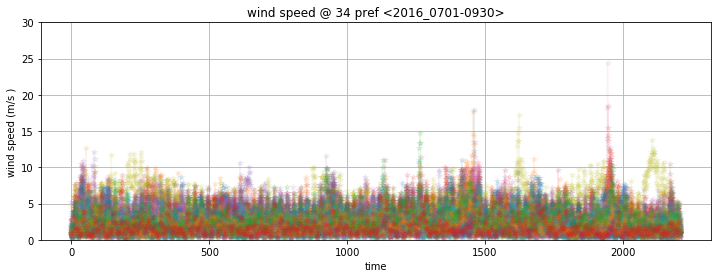

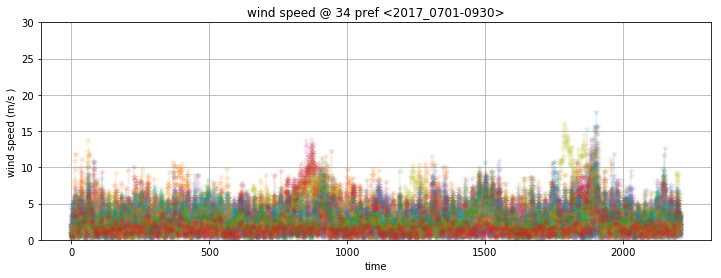

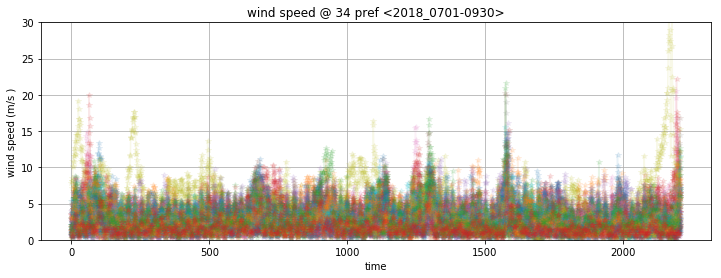

In [56]:
x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([0,30])
plt.ylabel('wind speed (m/s )')
plt.xlabel('time')
plt.grid()
for i in pref:
    plt.plot(x,df2016[df2016['place']==i].loc[:,'wind_speed'], marker="*", ls="-",label=i,alpha=0.1)
plt.title('wind speed @ 34 pref <2016_0701-0930>')
plt.show()

x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([0,30])
plt.ylabel('wind speed (m/s )')
plt.xlabel('time')
plt.grid()
for i in pref:
    plt.plot(x,df2017[df2017['place']==i].loc[:,'wind_speed'], marker="*", ls="-",label=i,alpha=0.1)
plt.title('wind speed @ 34 pref <2017_0701-0930>')
plt.show()

x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([0,30])
plt.ylabel('wind speed (m/s )')
plt.xlabel('time')
plt.grid()
for i in pref:
    plt.plot(x,df2018[df2018['place']==i].loc[:,'wind_speed'], marker="*", ls="-",label=i,alpha=0.1)
plt.title('wind speed @ 34 pref <2018_0701-0930>')
plt.show()

+ 上記グラフからは地域、年度による傾向は特段見られない
+ 地域によっては大きな値を持つ時間・時期あり（台風など）

### 全天日射量

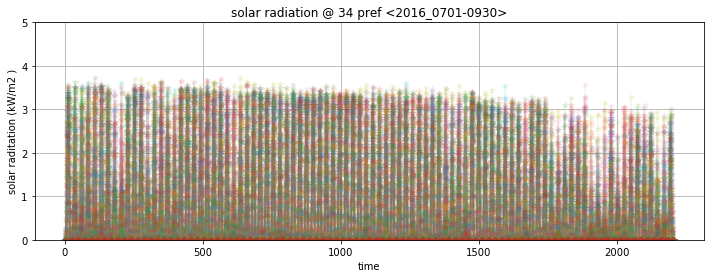

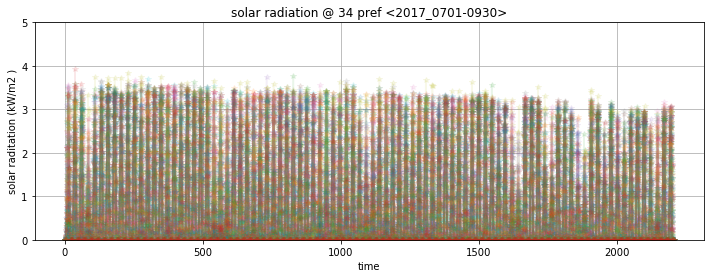

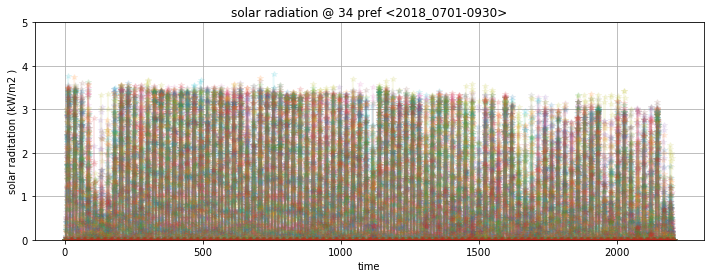

In [57]:
x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([0,5])
plt.ylabel('solar raditation (kW/m2 )')
plt.xlabel('time')
plt.grid()
for i in pref:
    plt.plot(x,df2016[df2016['place']==i].loc[:,'solar_radiation'], marker="*", ls="-",label=i,alpha=0.1)
plt.title('solar radiation @ 34 pref <2016_0701-0930>')
plt.show()

x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([0,5])
plt.ylabel('solar raditation (kW/m2 )')
plt.xlabel('time')
plt.grid()
for i in pref:
    plt.plot(x,df2017[df2017['place']==i].loc[:,'solar_radiation'], marker="*", ls="-",label=i,alpha=0.1)
plt.title('solar radiation @ 34 pref <2017_0701-0930>')
plt.show()

x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([0,5])
plt.ylabel('solar raditation (kW/m2 )')
plt.xlabel('time')
plt.grid()
for i in pref:
    plt.plot(x,df2018[df2018['place']==i].loc[:,'solar_radiation'], marker="*", ls="-",label=i,alpha=0.1)
plt.title('solar radiation @ 34 pref <2018_0701-0930>')
plt.show()

+ 時間経過とともに減少傾向
+ 地域による差が見られる

### 相対湿度

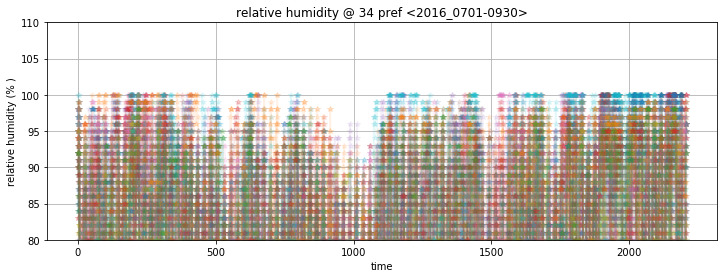

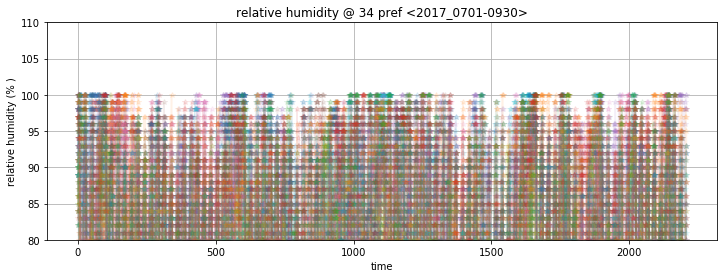

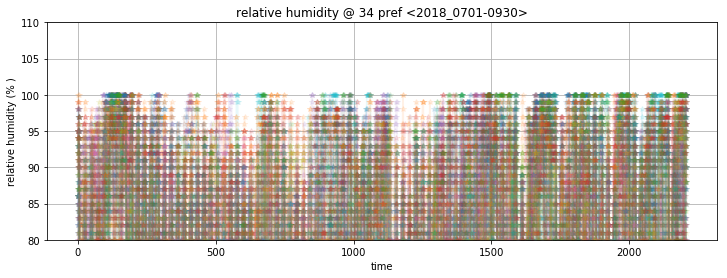

In [58]:
x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([80,110])
plt.ylabel('relative humidity (% )')
plt.xlabel('time')
plt.grid()
for i in pref:
    plt.plot(x,df2016[df2016['place']==i].loc[:,'relative_humidity'], marker="*", ls="-",label=i,alpha=0.1)
plt.title('relative humidity @ 34 pref <2016_0701-0930>')
plt.show()

x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([80,110])
plt.ylabel('relative humidity (% )')
plt.xlabel('time')
plt.grid()
for i in pref:
    plt.plot(x,df2017[df2017['place']==i].loc[:,'relative_humidity'], marker="*", ls="-",label=i,alpha=0.1)
plt.title('relative humidity @ 34 pref <2017_0701-0930>')
plt.show()

x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([80,110])
plt.ylabel('relative humidity (% )')
plt.xlabel('time')
plt.grid()
for i in pref:
    plt.plot(x,df2018[df2018['place']==i].loc[:,'relative_humidity'], marker="*", ls="-",label=i,alpha=0.1)
plt.title('relative humidity @ 34 pref <2018_0701-0930>')
plt.show()

+ 全国的に多湿であることが分かるが特段、地域、年度による傾向は確認できない

## 年度別

代表として東京、名古屋、大阪の年度別データを表示

### 気温

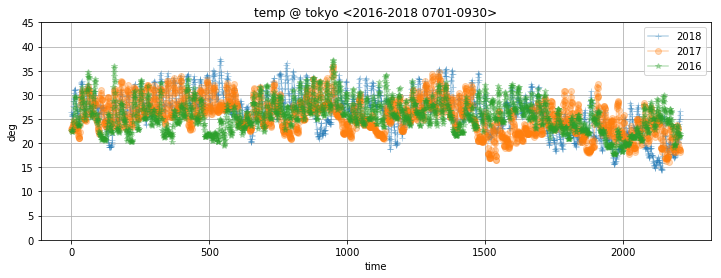

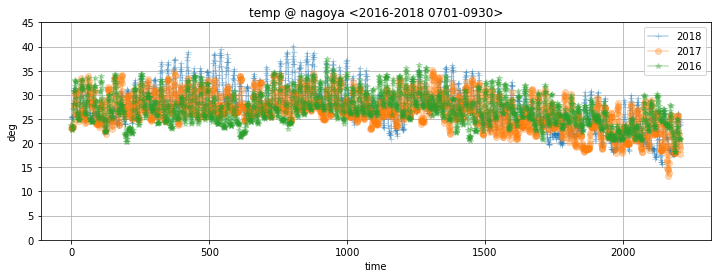

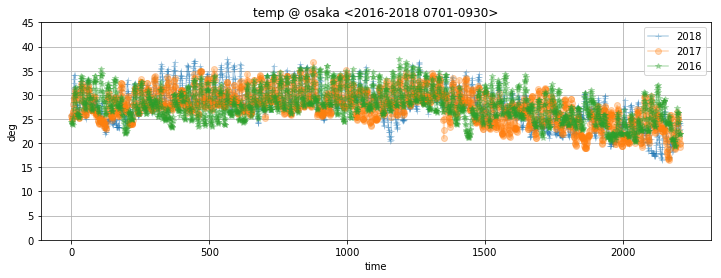

In [59]:
x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([0,45])
plt.ylabel('deg')
plt.grid()
t8=df2018[df2018['place']=='tokyo'].loc[:,'temp']
t7=df2017[df2017['place']=='tokyo'].loc[:,'temp']
t6=df2016[df2016['place']=='tokyo'].loc[:,'temp']
plt.plot(x,t8, marker="+", ls="-",label="2018",alpha=0.3)
plt.plot(x,t7, marker="o", ls="-",label="2017",alpha=0.3)
plt.plot(x,t6, marker="*", ls="-",label="2016",alpha=0.3)
plt.xlabel("time")
plt.legend()
plt.title('temp @ tokyo <2016-2018 0701-0930>')
plt.show()

x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([0,45])
plt.ylabel('deg')
plt.grid()
n8=df2018[df2018['place']=='nagoya'].loc[:,'temp']
n7=df2017[df2017['place']=='nagoya'].loc[:,'temp']
n6=df2016[df2016['place']=='nagoya'].loc[:,'temp']
plt.plot(x,n8, marker="+", ls="-",label="2018",alpha=0.3)
plt.plot(x,n7, marker="o", ls="-",label="2017",alpha=0.3)
plt.plot(x,n6, marker="*", ls="-",label="2016",alpha=0.3)
plt.xlabel("time")
plt.legend()
plt.title('temp @ nagoya <2016-2018 0701-0930>')
plt.show()

x=range(0,2208)
plt.figure(figsize=(12,4))
plt.ylim([0,45])
plt.ylabel('deg')
plt.grid()
o8=df2018[df2018['place']=='osaka'].loc[:,'temp']
o7=df2017[df2017['place']=='osaka'].loc[:,'temp']
o6=df2016[df2016['place']=='osaka'].loc[:,'temp']
plt.plot(x,o8, marker="+", ls="-",label="2018",alpha=0.3)
plt.plot(x,o7, marker="o", ls="-",label="2017",alpha=0.3)
plt.plot(x,o6, marker="*", ls="-",label="2016",alpha=0.3)
plt.xlabel("time")
plt.legend()
plt.title('temp @ osaka <2016-2018 0701-0930>')
plt.show()

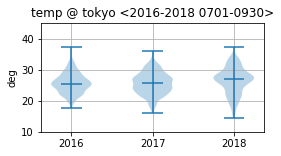

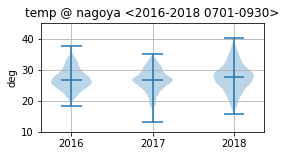

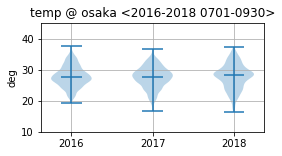

In [60]:
fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([t6, t7, t8],showmedians=True)
plt.grid()
plt.ylim([10,45])
plt.ylabel('deg')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['2016', '2017', '2018'])
plt.title('temp @ tokyo <2016-2018 0701-0930>')
plt.show()

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([n6, n7, n8],showmedians=True)
plt.grid()
plt.ylim([10,45])
plt.ylabel('deg')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['2016', '2017', '2018'])
plt.title('temp @ nagoya <2016-2018 0701-0930>')
plt.show()

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([o6, o7, o8],showmedians=True)
plt.grid()
plt.ylim([10,45])
plt.ylabel('deg')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['2016', '2017', '2018'])
plt.title('temp @ osaka <2016-2018 0701-0930>')
plt.show()

+ 中央値は年ごとに増加し、最小最大の温度差も拡大
+ 大阪は年度ごとの差異が小さい
+ 東京、名古屋は高温の頻度が増加→緯度による影響と想定

### 風速

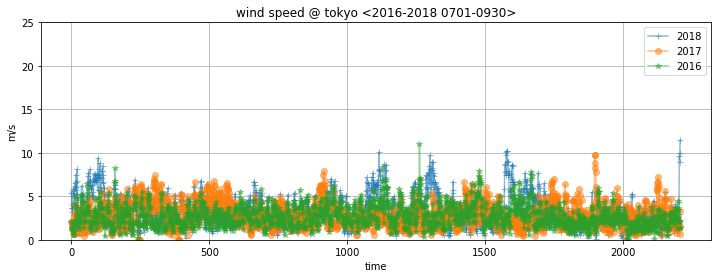

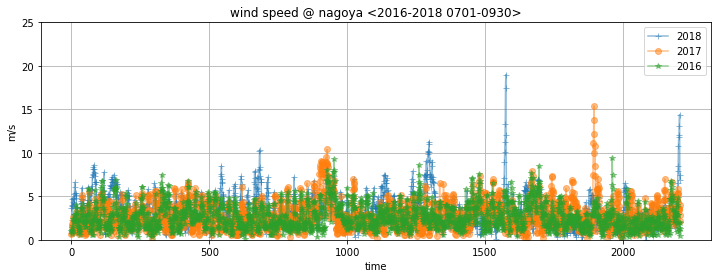

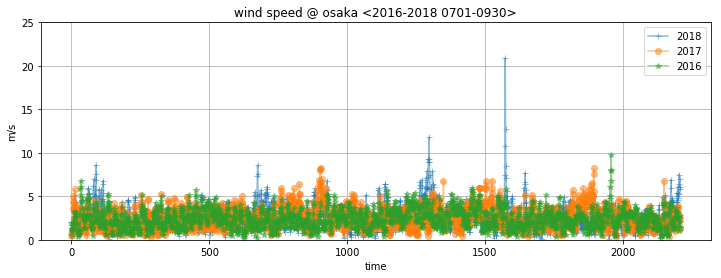

In [61]:
x = range(0, 2208)
plt.figure(figsize=(12, 4))
plt.ylim([0, 25])
plt.ylabel('m/s')
plt.grid()
t8w = df2018[df2018['place'] == 'tokyo'].loc[:, 'wind_speed'].fillna(0)
t7w = df2017[df2017['place'] == 'tokyo'].loc[:, 'wind_speed'].fillna(0)
t6w = df2016[df2016['place'] == 'tokyo'].loc[:, 'wind_speed'].fillna(0)
plt.plot(x, t8w, marker="+", ls="-", label="2018", alpha=0.5)
plt.plot(x, t7w, marker="o", ls="-", label="2017", alpha=0.5)
plt.plot(x, t6w, marker="*", ls="-", label="2016", alpha=0.5)
plt.xlabel("time")
plt.legend()
plt.title('wind speed @ tokyo <2016-2018 0701-0930>')
plt.show()

x = range(0, 2208)
plt.figure(figsize=(12, 4))
plt.ylim([0, 25])
plt.ylabel('m/s')
plt.grid()
n8w = df2018[df2018['place'] == 'nagoya'].loc[:, 'wind_speed'].fillna(0)
n7w = df2017[df2017['place'] == 'nagoya'].loc[:, 'wind_speed'].fillna(0)
n6w = df2016[df2016['place'] == 'nagoya'].loc[:, 'wind_speed'].fillna(0)
plt.plot(x, n8w, marker="+", ls="-", label="2018", alpha=0.5)
plt.plot(x, n7w, marker="o", ls="-", label="2017", alpha=0.5)
plt.plot(x, n6w, marker="*", ls="-", label="2016", alpha=0.5)
plt.xlabel("time")
plt.legend()
plt.title('wind speed @ nagoya <2016-2018 0701-0930>')
plt.show()

x = range(0, 2208)
plt.figure(figsize=(12, 4))
plt.ylim([0, 25])
plt.ylabel('m/s')
plt.grid()
o8w = df2018[df2018['place'] == 'osaka'].loc[:, 'wind_speed'].fillna(0)
o7w = df2017[df2017['place'] == 'osaka'].loc[:, 'wind_speed'].fillna(0)
o6w = df2016[df2016['place'] == 'osaka'].loc[:, 'wind_speed'].fillna(0)
plt.plot(x, o8w, marker="+", ls="-", label="2018", alpha=0.5)
plt.plot(x, o7w, marker="o", ls="-", label="2017", alpha=0.5)
plt.plot(x, o6w, marker="*", ls="-", label="2016", alpha=0.5)
plt.xlabel("time")
plt.legend()
plt.title('wind speed @ osaka <2016-2018 0701-0930>')
plt.show()

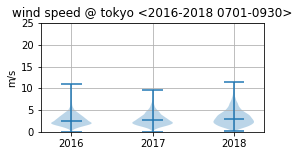

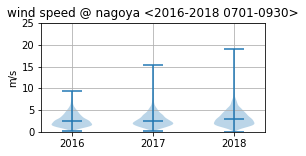

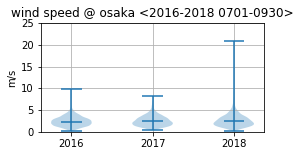

In [62]:
fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([t6w, t7w, t8w],showmedians=True)
plt.ylim([0,25])
plt.ylabel('m/s')
plt.grid()
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['2016', '2017', '2018'])
plt.title('wind speed @ tokyo <2016-2018 0701-0930>')
plt.show()

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([n6w, n7w, n8w],showmedians=True)
plt.ylim([0,25])
plt.ylabel('m/s')
plt.grid()
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['2016', '2017', '2018'])
plt.title('wind speed @ nagoya <2016-2018 0701-0930>')
plt.show()

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([o6w, o7w, o8w],showmedians=True)
plt.ylim([0,25])
plt.ylabel('m/s')
plt.grid()
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['2016', '2017', '2018'])
plt.title('wind speed @ osaka <2016-2018 0701-0930>')
plt.show()

+ 中央値、最頻値は地域、年度による大きな特徴は見られない
+ 最大値は地域差が見られる（台風など）

### 全天日射量

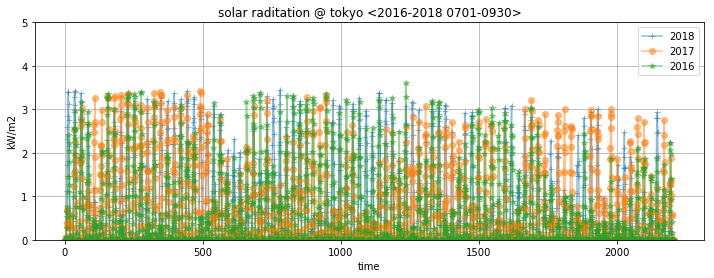

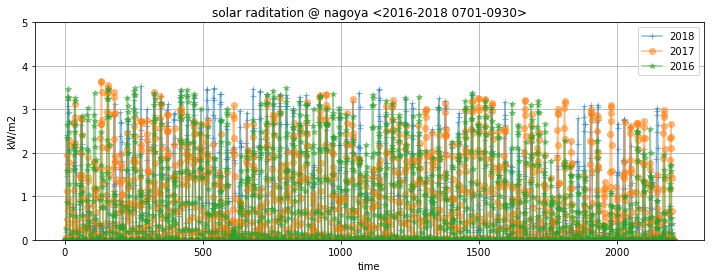

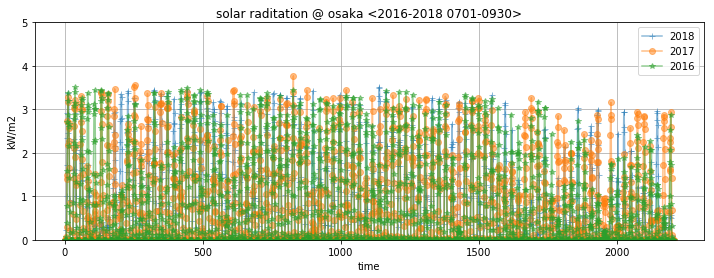

In [63]:
x = range(0, 2208)
plt.figure(figsize=(12, 4))
plt.ylim([0, 5])
plt.ylabel('kW/m2')
plt.grid()
t8s = df2018[df2018['place'] == 'tokyo'].loc[:, 'solar_radiation'].fillna(0)
t7s = df2017[df2017['place'] == 'tokyo'].loc[:, 'solar_radiation'].fillna(0)
t6s = df2016[df2016['place'] == 'tokyo'].loc[:, 'solar_radiation'].fillna(0)
plt.plot(x, t8s, marker="+", ls="-", label="2018", alpha=0.5)
plt.plot(x, t7s, marker="o", ls="-", label="2017", alpha=0.5)
plt.plot(x, t6s, marker="*", ls="-", label="2016", alpha=0.5)
plt.xlabel("time")
plt.legend()
plt.title('solar raditation @ tokyo <2016-2018 0701-0930>')
plt.show()

x = range(0, 2208)
plt.figure(figsize=(12, 4))
plt.ylim([0, 5])
plt.ylabel('kW/m2')
plt.grid()
n8s = df2018[df2018['place'] == 'nagoya'].loc[:, 'solar_radiation'].fillna(0)
n7s = df2017[df2017['place'] == 'nagoya'].loc[:, 'solar_radiation'].fillna(0)
n6s = df2016[df2016['place'] == 'nagoya'].loc[:, 'solar_radiation'].fillna(0)
plt.plot(x, n8s, marker="+", ls="-", label="2018", alpha=0.5)
plt.plot(x, n7s, marker="o", ls="-", label="2017", alpha=0.5)
plt.plot(x, n6s, marker="*", ls="-", label="2016", alpha=0.5)
plt.xlabel("time")
plt.legend()
plt.title('solar raditation @ nagoya <2016-2018 0701-0930>')
plt.show()

x = range(0, 2208)
plt.figure(figsize=(12, 4))
plt.ylim([0, 5])
plt.ylabel('kW/m2')
plt.grid()
o8s = df2018[df2018['place'] == 'osaka'].loc[:, 'solar_radiation'].fillna(0)
o7s = df2017[df2017['place'] == 'osaka'].loc[:, 'solar_radiation'].fillna(0)
o6s = df2016[df2016['place'] == 'osaka'].loc[:, 'solar_radiation'].fillna(0)
plt.plot(x, o8s, marker="+", ls="-", label="2018", alpha=0.5)
plt.plot(x, o7s, marker="o", ls="-", label="2017", alpha=0.5)
plt.plot(x, o6s, marker="*", ls="-", label="2016", alpha=0.5)
plt.xlabel("time")
plt.legend()
plt.title('solar raditation @ osaka <2016-2018 0701-0930>')
plt.show()

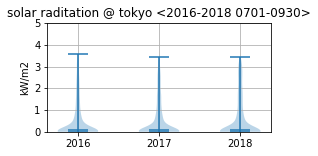

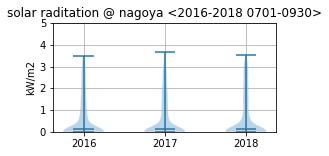

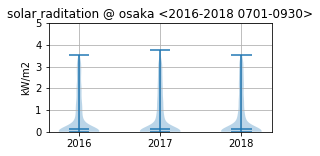

In [64]:
fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([t6s, t7s, t8s],showmedians=True)
plt.ylim([0, 5])
plt.ylabel('kW/m2')
plt.grid()
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['2016', '2017', '2018'])
plt.title('solar raditation @ tokyo <2016-2018 0701-0930>')
plt.show()

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([n6s, n7s, n8s],showmedians=True)
plt.ylim([0, 5])
plt.ylabel('kW/m2')
plt.grid()
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['2016', '2017', '2018'])
plt.title('solar raditation @ nagoya <2016-2018 0701-0930>')
plt.show()

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([o6s, o7s, o8s],showmedians=True)
plt.ylim([0, 5])
plt.ylabel('kW/m2')
plt.grid()
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['2016', '2017', '2018'])
plt.title('solar raditation @ osaka <2016-2018 0701-0930>')
plt.show()

+ 年度、地域による大きな特徴は見られない
+ 夜間を除いた分析が必要かも知れない

### 相対湿度

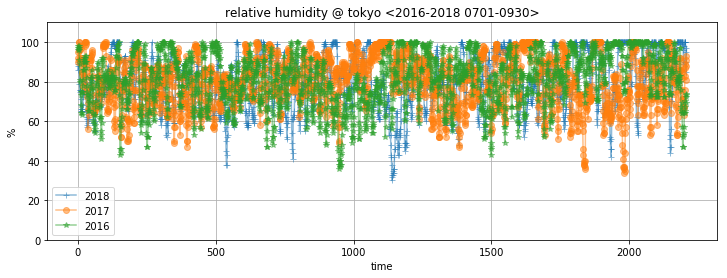

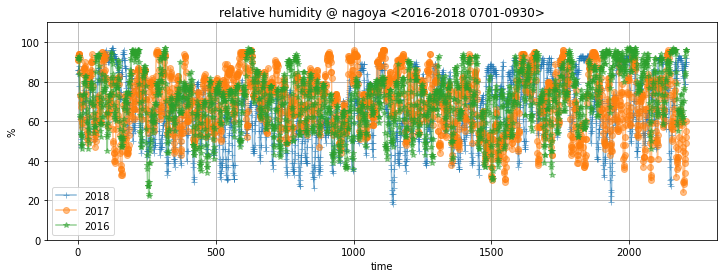

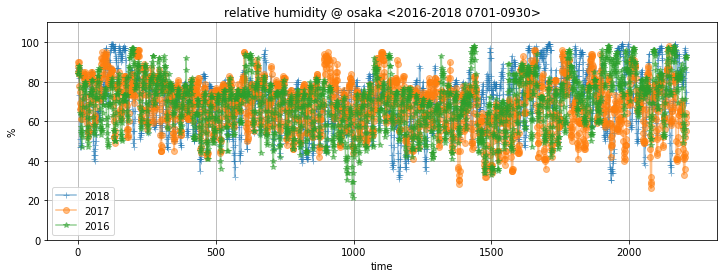

In [65]:
x = range(0, 2208)
plt.figure(figsize=(12, 4))
plt.ylim([0, 110])
plt.ylabel('%')
plt.grid()
t8r = df2018[df2018['place'] == 'tokyo'].loc[:, 'relative_humidity'].fillna(0)
t7r = df2017[df2017['place'] == 'tokyo'].loc[:, 'relative_humidity'].fillna(0)
t6r = df2016[df2016['place'] == 'tokyo'].loc[:, 'relative_humidity'].fillna(0)
plt.plot(x, t8r, marker="+", ls="-", label="2018", alpha=0.5)
plt.plot(x, t7r, marker="o", ls="-", label="2017", alpha=0.5)
plt.plot(x, t6r, marker="*", ls="-", label="2016", alpha=0.5)
plt.xlabel("time")
plt.legend()
plt.title('relative humidity @ tokyo <2016-2018 0701-0930>')
plt.show()

x = range(0, 2208)
plt.figure(figsize=(12, 4))
plt.ylim([0, 110])
plt.ylabel('%')
plt.grid()
n8r = df2018[df2018['place'] == 'nagoya'].loc[:, 'relative_humidity'].fillna(0)
n7r = df2017[df2017['place'] == 'nagoya'].loc[:, 'relative_humidity'].fillna(0)
n6r = df2016[df2016['place'] == 'nagoya'].loc[:, 'relative_humidity'].fillna(0)
plt.plot(x, n8r, marker="+", ls="-", label="2018", alpha=0.5)
plt.plot(x, n7r, marker="o", ls="-", label="2017", alpha=0.5)
plt.plot(x, n6r, marker="*", ls="-", label="2016", alpha=0.5)
plt.xlabel("time")
plt.legend()
plt.title('relative humidity @ nagoya <2016-2018 0701-0930>')
plt.show()

x = range(0, 2208)
plt.figure(figsize=(12, 4))
plt.ylim([0, 110])
plt.ylabel('%')
plt.grid()
o8r = df2018[df2018['place'] == 'osaka'].loc[:, 'relative_humidity'].fillna(0)
o7r = df2017[df2017['place'] == 'osaka'].loc[:, 'relative_humidity'].fillna(0)
o6r = df2016[df2016['place'] == 'osaka'].loc[:, 'relative_humidity'].fillna(0)
plt.plot(x, o8r, marker="+", ls="-", label="2018", alpha=0.5)
plt.plot(x, o7r, marker="o", ls="-", label="2017", alpha=0.5)
plt.plot(x, o6r, marker="*", ls="-", label="2016", alpha=0.5)
plt.xlabel("time")
plt.legend()
plt.title('relative humidity @ osaka <2016-2018 0701-0930>')
plt.show()


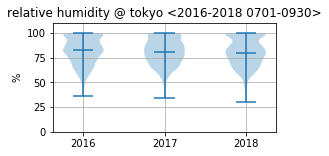

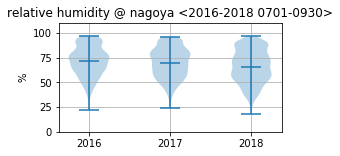

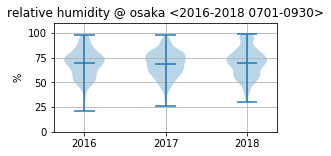

In [66]:
fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([t6r, t7r, t8r],showmedians=True)
plt.ylim([0, 110])
plt.ylabel('%')
plt.grid()
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['2016', '2017', '2018'])
plt.title('relative humidity @ tokyo <2016-2018 0701-0930>')
plt.show()

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([n6r, n7r, n8r],showmedians=True)
plt.ylim([0, 110])
plt.ylabel('%')
plt.grid()
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['2016', '2017', '2018'])
plt.title('relative humidity @ nagoya <2016-2018 0701-0930>')
plt.show()

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([o6r, o7r, o8r],showmedians=True)
plt.ylim([0, 110])
plt.ylabel('%')
plt.grid()
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['2016', '2017', '2018'])
plt.title('relative humidity @ osaka <2016-2018 0701-0930>')
plt.show()

+ 年度による傾向は特段見られない
+ 湿度分布は地域差が大きい
+ １００％近くの多湿となる頻度は、東京＞名古屋＞大阪

# 正規分布

（入力のみ＆時系列以外）

## 一次元正規分布

+ 温度などは時系列データと解釈できるため自己相関を考慮する必要があるがまずは単純に当てはめてみる

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats #統計に関するライブラリ
from matplotlib.lines import Line2D  

In [68]:
# 名古屋２０１７

df2017[df2017['place']=='nagoya'].head()

place              time  temp  wind_speed  solar_radiation  \
35328  nagoya  2017/7/1 1:00:00  23.1         0.7              0.0   
35329  nagoya  2017/7/1 2:00:00  23.3         1.1              0.0   
35330  nagoya  2017/7/1 3:00:00  23.2         1.8              0.0   
35331  nagoya  2017/7/1 4:00:00  23.1         1.6              0.0   
35332  nagoya  2017/7/1 5:00:00  23.1         0.8              0.0   

       relative_humidity  
35328               91.0  
35329               91.0  
35330               93.0  
35331               94.0  
35332               94.0

26.643885869565285
3.509935268409313


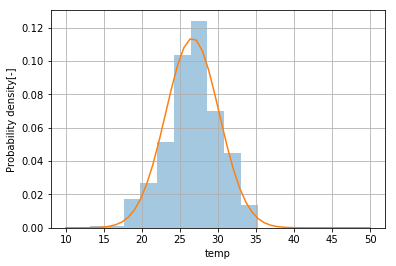

In [69]:
ax = sns.distplot(
    df2017[df2017['place'] == 'nagoya'].loc[:, 'temp'],
    kde=False,
    bins=10,
    norm_hist=True)
# ax.set_ylabel("count per hour")
plt.grid()

muhat_t = df2017[df2017['place'] == 'nagoya'].loc[:, 'temp'].mean()
sigmahat_t = df2017[df2017['place'] == 'nagoya'].loc[:, 'temp'].std(ddof=0)

print(muhat_t)
print(sigmahat_t)

x = np.linspace(10, 50, 50)
y = stats.norm.pdf(x, loc=muhat_t, scale=sigmahat_t)
plt.plot(x, y)
plt.ylabel("Probability density[-]")

plt.show()

2.805525362318842
1.594270849898164


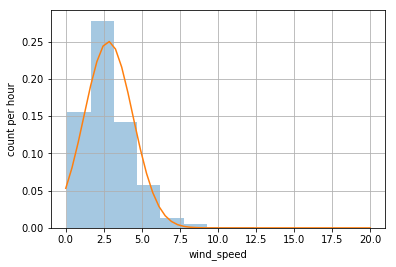

In [70]:
ax = sns.distplot(
    df2017[df2017['place'] == 'nagoya'].loc[:, 'wind_speed'],
    kde=False,
    bins=10,
    norm_hist=True)

plt.grid()

muhat_w = df2017[df2017['place'] == 'nagoya'].loc[:, 'wind_speed'].mean()
sigmahat_w = df2017[df2017['place'] == 'nagoya'].loc[:, 'wind_speed'].std(ddof=0)

print(muhat_w)
print(sigmahat_w)

x = np.linspace(0, 20, 50)
y = stats.norm.pdf(x, loc=muhat_w, scale=sigmahat_w)
plt.plot(x, y)
plt.ylabel("Probability density[-]")

ax.set_ylabel("count per hour")
plt.show()

0.690674818840579
0.9393656061850033


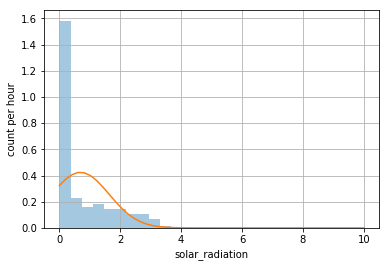

In [71]:
ax = sns.distplot(
    df2017[df2017['place'] == 'nagoya'].loc[:, 'solar_radiation'],
    kde=False,
    bins=10,
    norm_hist=True)

plt.grid()

muhat_s = df2017[df2017['place'] == 'nagoya'].loc[:, 'solar_radiation'].mean()
sigmahat_s = df2017[df2017['place'] == 'nagoya'].loc[:, 'solar_radiation'].std(ddof=0)

print(muhat_s)
print(sigmahat_s)

x = np.linspace(0, 10, 50)
y = stats.norm.pdf(x, loc=muhat_s, scale=sigmahat_s)
plt.plot(x, y)
plt.ylabel("Probability density[-]")

ax.set_ylabel("count per hour")
plt.show()

69.47916666666667
15.119527421532784


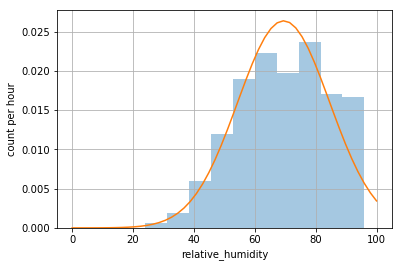

In [72]:
ax = sns.distplot(
    df2017[df2017['place'] == 'nagoya'].loc[:, 'relative_humidity'],
    kde=False,
    bins=10,
    norm_hist=True)

muhat_r = df2017[df2017['place'] == 'nagoya'].loc[:, 'relative_humidity'].mean()
sigmahat_r = df2017[df2017['place'] == 'nagoya'].loc[:, 'relative_humidity'].std(ddof=0)

plt.grid()

print(muhat_r)
print(sigmahat_r)

x = np.linspace(0, 100, 50)
y = stats.norm.pdf(x, loc=muhat_r, scale=sigmahat_r)
plt.plot(x, y)
plt.ylabel("Probability density[-]")

ax.set_ylabel("count per hour")
plt.show()

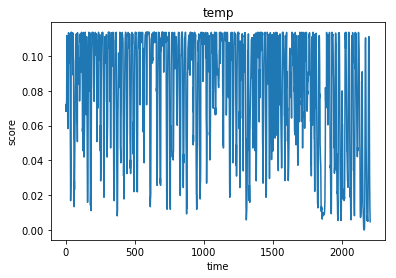

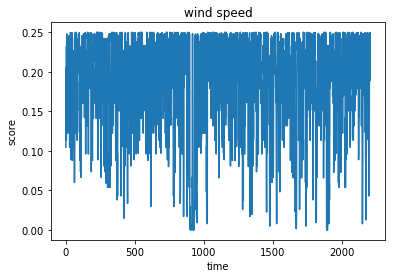

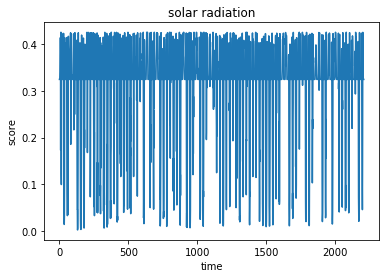

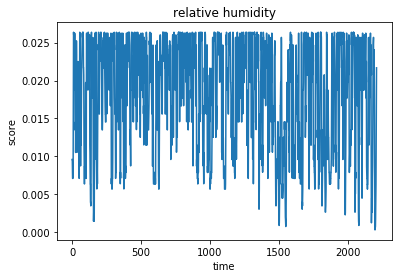

In [73]:
# 確率密度の小ささを異常度に用いる場合

# 気温
score_t = stats.norm.pdf(
    df2017[df2017['place'] == 'nagoya'].loc[:, 'temp'],
    loc=muhat_t,
    scale=sigmahat_t)
plt.plot(score_t)
plt.title("temp")
plt.xlabel("time")
plt.ylabel("score")
plt.show()

# 風速
score_w = stats.norm.pdf(
    df2017[df2017['place'] == 'nagoya'].loc[:, 'wind_speed'],
    loc=muhat_w,
    scale=sigmahat_w)
plt.plot(score_w)
plt.title("wind speed")
plt.xlabel("time")
plt.ylabel("score")
plt.show()

#　全天日射量
score_s = stats.norm.pdf(
    df2017[df2017['place'] == 'nagoya'].loc[:, 'solar_radiation'],
    loc=muhat_s,
    scale=sigmahat_s)
plt.plot(score_s)
plt.title("solar radiation")
plt.xlabel("time")
plt.ylabel("score")
plt.show()

# 相対湿度
score_r = stats.norm.pdf(
    df2017[df2017['place'] == 'nagoya'].loc[:, 'relative_humidity'],
    loc=muhat_r,
    scale=sigmahat_r)
plt.plot(score_r)
plt.title("relative humidity")
plt.xlabel("time")
plt.ylabel("score")
plt.show()

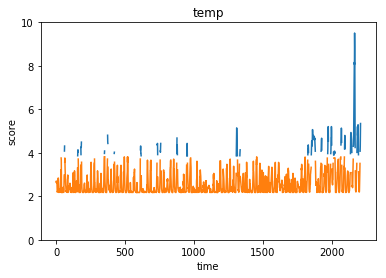

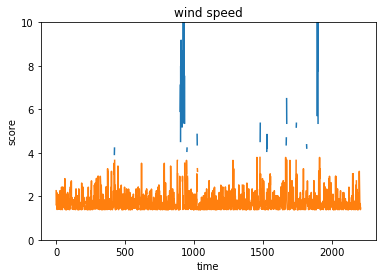

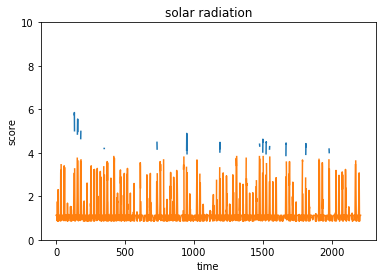

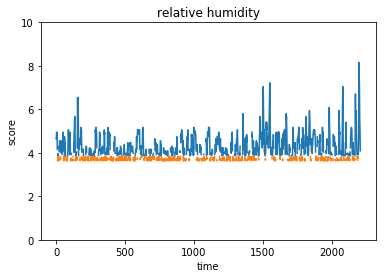

In [74]:
# 情報量を異常度に用いる場合

a_th = stats.chi2.ppf(0.95, df=1)
a_th

# 前提条件 １次元データ：x〜N（μ、σ２）、N>>1

x=range(0,2208)

# 気温
score_t = stats.norm.pdf(
    df2017[df2017['place'] == 'nagoya'].loc[:, 'temp'],
    loc=muhat_t,
    scale=sigmahat_t)
ascore_t = -np.log(score_t)

supper_t = np.ma.masked_where(ascore_t < a_th, ascore_t)
slower_t = np.ma.masked_where(ascore_t >= a_th, ascore_t)
plt.plot(x,supper_t,x,slower_t)

plt.ylim([0,10])
plt.title("temp")
plt.xlabel("time")
plt.ylabel("score")
plt.show()

# 風速
score_w = stats.norm.pdf(
    df2017[df2017['place'] == 'nagoya'].loc[:, 'wind_speed'],
    loc=muhat_w,
    scale=sigmahat_w)
ascore_w = -np.log(score_w)

supper_w = np.ma.masked_where(ascore_w < a_th, ascore_w)
slower_w = np.ma.masked_where(ascore_w >= a_th, ascore_w)
plt.plot(x,supper_w,x,slower_w)

plt.ylim([0,10])
plt.title("wind speed")
plt.xlabel("time")
plt.ylabel("score")
plt.show()

#　全天日射量
score_s = stats.norm.pdf(
    df2017[df2017['place'] == 'nagoya'].loc[:, 'solar_radiation'],
    loc=muhat_s,
    scale=sigmahat_s)
ascore_s = -np.log(score_s)

supper_s = np.ma.masked_where(ascore_s < a_th, ascore_s)
slower_s = np.ma.masked_where(ascore_s >= a_th, ascore_s)
plt.plot(x,supper_s,x,slower_s)

plt.ylim([0,10])
plt.title("solar radiation")
plt.xlabel("time")
plt.ylabel("score")
plt.show()

# 相対湿度
score_r = stats.norm.pdf(
    df2017[df2017['place'] == 'nagoya'].loc[:, 'relative_humidity'],
    loc=muhat_r,
    scale=sigmahat_r)
ascore_r = -np.log(score_r)

supper_r = np.ma.masked_where(ascore_r < a_th, ascore_r)
slower_r = np.ma.masked_where(ascore_r >= a_th, ascore_r)
plt.plot(x,supper_r,x,slower_r)

plt.ylim([0,10])
plt.title("relative humidity")
plt.xlabel("time")
plt.ylabel("score")
plt.show()

In [75]:
print(ascore_t.max())
print(ascore_t.min())

9.509895980200564
2.1746142950609126


In [76]:
print(df2017[df2017['place'] == 'nagoya'].iloc[np.argmax(ascore_t)])
print()
print(df2017[df2017['place'] == 'nagoya'].iloc[np.argmax(ascore_w)])
print()
print(df2017[df2017['place'] == 'nagoya'].iloc[np.argmax(ascore_s)])
print()
print(df2017[df2017['place'] == 'nagoya'].iloc[np.argmax(ascore_r)])

place                           nagoya
time                 2017/9/29 5:00:00
temp                              13.2
wind_speed                         1.4
solar_radiation                      0
relative_humidity                   80
Name: 37492, dtype: object

place                            nagoya
time                 2017/9/18 00:00:00
temp                                 26
wind_speed                         15.4
solar_radiation                       0
relative_humidity                    77
Name: 37223, dtype: object

place                           nagoya
time                 2017/7/6 13:00:00
temp                              30.9
wind_speed                         3.3
solar_radiation                   3.66
relative_humidity                   44
Name: 35460, dtype: object

place                            nagoya
time                 2017/9/30 13:00:00
temp                               25.6
wind_speed                          4.7
solar_radiation                    2.36
relative

## 二次元正規分布

まず気温と湿度の二次元で考えてみる（２０１７年）

∵
+ 風力のWGBTへの指標への影響が少ない（係数小）
+ 日射量は天候に左右され、かつ、各地域による差異が少ない

In [77]:
x_t = df2017[df2017['place'] == 'tokyo'].loc[:, 'relative_humidity']
y_t = df2017[df2017['place'] == 'tokyo'].loc[:, 'temp']
df_tr_t = pd.concat([x_t, y_t], axis=1)

x_n = df2017[df2017['place'] == 'nagoya'].loc[:, 'relative_humidity']
y_n = df2017[df2017['place'] == 'nagoya'].loc[:, 'temp']
df_tr_n = pd.concat([x_n, y_n], axis=1)

x_o = df2017[df2017['place'] == 'osaka'].loc[:, 'relative_humidity']
y_o = df2017[df2017['place'] == 'osaka'].loc[:, 'temp']
df_tr_o = pd.concat([x_o, y_o], axis=1)

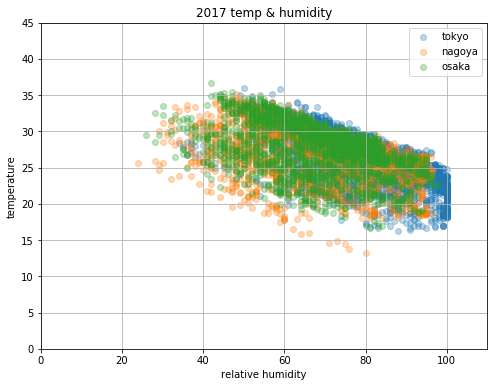

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(df_tr_t["relative_humidity"], df_tr_t["temp"],alpha=0.3)
plt.scatter(df_tr_n["relative_humidity"], df_tr_n["temp"],alpha=0.3)
plt.scatter(df_tr_o["relative_humidity"], df_tr_o["temp"],alpha=0.3)

plt.title("2017 temp & humidity")

plt.grid()
plt.xlim([0,110])
plt.ylim([0,45])
plt.legend(["tokyo","nagoya","osaka"])
plt.xlabel("relative humidity")
plt.ylabel("temperature")

plt.show()


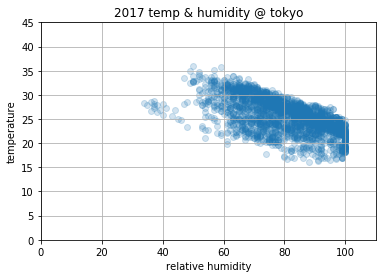

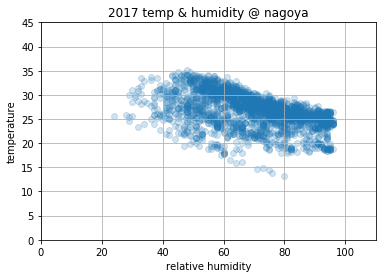

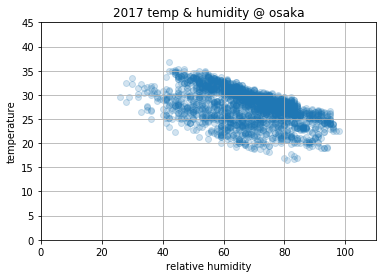

In [79]:
plt.scatter(df_tr_t["relative_humidity"], df_tr_t["temp"],alpha=0.2)
plt.title("2017 temp & humidity @ tokyo")
plt.grid()
plt.xlim([0,110])
plt.ylim([0,45])
plt.xlabel("relative humidity")
plt.ylabel("temperature")
plt.show()

plt.scatter(df_tr_n["relative_humidity"], df_tr_n["temp"],alpha=0.2)
plt.title("2017 temp & humidity @ nagoya")
plt.grid()
plt.xlim([0,110])
plt.ylim([0,45])
plt.xlabel("relative humidity")
plt.ylabel("temperature")
plt.show()

plt.scatter(df_tr_o["relative_humidity"], df_tr_o["temp"],alpha=0.2)
plt.title("2017 temp & humidity @ osaka")
plt.grid()
plt.xlim([0,110])
plt.ylim([0,45])
plt.xlabel("relative humidity")
plt.ylabel("temperature")
plt.show()

 $\displaystyle \hat{\boldsymbol  \mu}=\frac{1}{N}\sum_{n=1}^{N} x^{(n)}$  
$\displaystyle \hat{\Sigma}=\frac{1}{N}\sum_{n=1}^{N} ({\boldsymbol x}^{(n)}-\hat{\boldsymbol \mu})({\boldsymbol x}^{(n)}-\hat{\boldsymbol  \mu})^T$  

In [81]:
muhat = df_tr_n[["relative_humidity", "temp"]].mean().values
X = df_tr_n[["relative_humidity", "temp"]].values

li = 0
for i in range(2208):
    li += np.dot((X[i, :] - muhat).reshape(2, 1), (X[i, :] - muhat).reshape(
        1, 2))
sigmahat = li / 2208

print(muhat)
print()
print(sigmahat)

[69.47916667 26.64388587]

[[228.60010945 -23.70798517]
 [-23.70798517  12.31964559]]


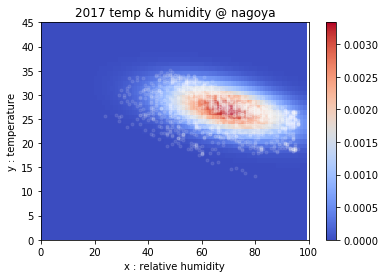

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from pylab import *  #コンタ描画用


def f(x, y):
    det = np.linalg.det(sigma)
    if det < 0:
        sys.exit()
    inv_sigma = np.linalg.inv(sigma)
    x_c = np.array([x, y]) - mu

    return 1 / (2 * np.pi * np.sqrt(det)) * np.exp(
        -x_c.dot(inv_sigma).dot(x_c.T) / 2.0)

x = y = np.arange(0, 100, 1)
X, Y = np.meshgrid(x, y)

mu = muhat
sigma = sigmahat
Z = np.vectorize(f)(X, Y)

#目的関数
plt.pcolor(X, Y, Z, cmap=cm.coolwarm)
plt.colorbar()

#表示範囲
plt.xlim([0, 100])
plt.ylim([0, 45])

plt.xlabel("x : relative humidity")
plt.ylabel("y : temperature")

plt.plot(
    df_tr_n["relative_humidity"],
    df_tr_n["temp"],
    ls="",
    marker="o",
    color="white",
    alpha=0.1,
    markersize=3)
plt.title("2017 temp & humidity @ nagoya")

#描画
plt.show()

### 情報量による異常度

$\displaystyle a({\boldsymbol  x'}) = -\ln(p({\boldsymbol  x'}))$

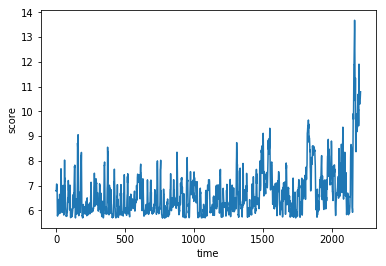

In [84]:
score = stats.multivariate_normal.pdf(df_tr_n[["relative_humidity", "temp"]], mean=muhat, cov=sigmahat)
ascore = -np.log(score)
plt.plot(ascore)
plt.xlabel("time")
plt.ylabel("score")
plt.show()

### Hotelling T2による異常度

  $\displaystyle a({\boldsymbol x}') = \left({\boldsymbol  x}'  - \hat {\boldsymbol  \mu} \right)^T\hat \Sigma^{-1}\left({\hat {\boldsymbol x}}' - \hat {\boldsymbol \mu} \right)$  

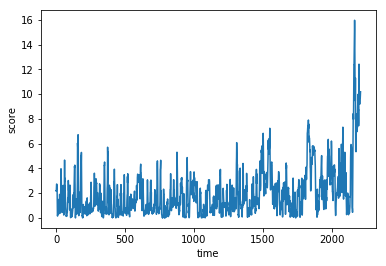

In [86]:

def calc_score(df, mu, sigma):
    inv_sigma = np.linalg.inv(sigma)
    li = []
    for ind, rows in df.iterrows():
        X = rows[[0, 1]].values
        score = (X - muhat).reshape(1, 2).dot(inv_sigma).dot(
            (X - muhat).reshape(2, 1))
        li.append(score[0])
    return li

ascore = calc_score(df_tr_n[["relative_humidity", "temp"]], muhat, sigmahat)
plt.plot(ascore)
plt.xlabel("time")
plt.ylabel("score")
plt.show()

+ 情報量よりホテリングT2の方が異常度が顕著に現れている

### 性能評価

In [87]:
import scipy.stats as stats
from IPython.display import display
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

#### 異常データ仮定1

In [88]:
N_ABN=58
N_MAX=2208
N_BOD=N_MAX-N_ABN

ascore_normal = ascore[0:N_BOD]
ascore_abnormal = ascore[N_BOD:N_MAX]

df_normal = pd.DataFrame(ascore_normal, columns=["anomaly score"])
df_normal["label"] = 0
df_abnormal = pd.DataFrame(ascore_abnormal, columns=["anomaly score"])
df_abnormal["label"] = 1
df_score = pd.concat([df_normal, df_abnormal])

display(df_score.head())
display(df_score.groupby("label")["anomaly score"].count())

anomaly score  label
0       2.200566      0
1       2.151403      0
2       2.522412      0
3       2.731814      0
4       2.731814      0

label
0    2150
1      58
Name: anomaly score, dtype: int64

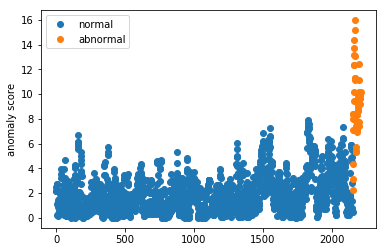

In [89]:
x0=range(0,N_BOD)
x1=range(N_BOD,N_MAX)

plt.plot(x0,ascore_normal, marker="o", ls="")
plt.plot(x1,ascore_abnormal, marker="o", ls="")
plt.legend(["normal","abnormal"])
plt.ylabel("anomaly score")
plt.show()

In [90]:
# 閾値
a_th = 10
df_score["label_pred"] = 0
df_score.loc[df_score["anomaly score"] > a_th, "label_pred"] = 1

# Accuracy/Recall/Precision/F1-score
print("accuracy=", accuracy_score(df_score["label"], df_score["label_pred"]))
print("recall=", recall_score(df_score["label"], df_score["label_pred"]))
print("precision=",precision_score(df_score["label"], df_score["label_pred"]))
print("f1=", f1_score(df_score["label"], df_score["label_pred"]))

accuracy= 0.9814311594202898
recall= 0.29310344827586204
precision= 1.0
f1= 0.4533333333333333


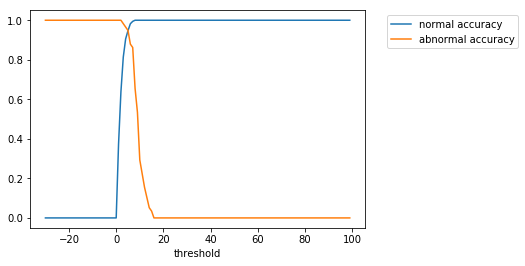

In [91]:
li_ath = []
li_abnormal_accuracy = []
li_normal_accuracy = []
for a_th in range(-30, 100):
    df_score["label_pred"] = 0
    df_score.loc[df_score["anomaly score"]>a_th, "label_pred"] = 1
    abnormal_accuracy = recall_score(df_score["label"], df_score["label_pred"], pos_label=1)# 異常標本精度
    normal_accuracy = recall_score(df_score["label"], df_score["label_pred"], pos_label=0)# 正常標本精度
    li_ath.append(a_th)
    li_abnormal_accuracy.append(abnormal_accuracy)
    li_normal_accuracy.append(normal_accuracy)    
    
    
# グラフを描画
plt.plot(li_ath, li_normal_accuracy)
plt.plot(li_ath, li_abnormal_accuracy)
plt.xlabel("threshold")
plt.legend(["normal accuracy", "abnormal accuracy"],bbox_to_anchor=(1.05,1))
plt.show()

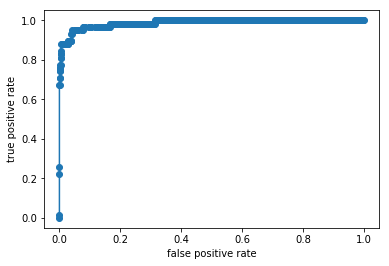

In [92]:
roc_auc_score(df_score["label"], df_score["anomaly score"])
fpr, tpr, thresholds = roc_curve(df_score["label"], df_score["anomaly score"])
plt.plot(fpr, tpr, marker="o")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [93]:
roc_auc_score(df_score["label"], df_score["anomaly score"])

0.987261427425822

#### 異常データ仮定2

In [94]:
N_ABN=70
N_MAX=2208
N_BOD=N_MAX-N_ABN

ascore_normal = ascore[0:N_BOD]
ascore_abnormal = ascore[N_BOD:N_MAX]

df_normal = pd.DataFrame(ascore_normal, columns=["anomaly score"])
df_normal["label"] = 0
df_abnormal = pd.DataFrame(ascore_abnormal, columns=["anomaly score"])
df_abnormal["label"] = 1
df_score = pd.concat([df_normal, df_abnormal])

display(df_score.head())
display(df_score.groupby("label")["anomaly score"].count())

anomaly score  label
0       2.200566      0
1       2.151403      0
2       2.522412      0
3       2.731814      0
4       2.731814      0

label
0    2138
1      70
Name: anomaly score, dtype: int64

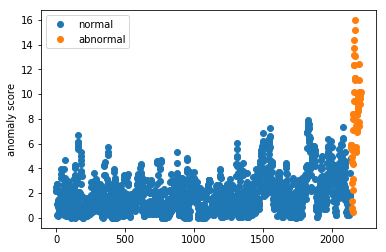

In [95]:
x0=range(0,N_BOD)
x1=range(N_BOD,N_MAX)

plt.plot(x0,ascore_normal, marker="o", ls="")
plt.plot(x1,ascore_abnormal, marker="o", ls="")
plt.legend(["normal","abnormal"])
plt.ylabel("anomaly score")
plt.show()

In [96]:
a_th = 10
df_score["label_pred"] = 0
df_score.loc[df_score["anomaly score"] > a_th, "label_pred"] = 1

print("accuracy=", accuracy_score(df_score["label"], df_score["label_pred"]))
print("recall=", recall_score(df_score["label"], df_score["label_pred"]))
print("precision=",precision_score(df_score["label"], df_score["label_pred"]))
print("f1=", f1_score(df_score["label"], df_score["label_pred"]))

accuracy= 0.9759963768115942
recall= 0.24285714285714285
precision= 1.0
f1= 0.3908045977011494


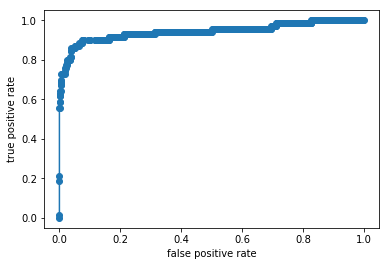

In [97]:
roc_auc_score(df_score["label"], df_score["anomaly score"])
fpr, tpr, thresholds = roc_curve(df_score["label"], df_score["anomaly score"])
plt.plot(fpr, tpr, marker="o")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [98]:
roc_auc_score(df_score["label"], df_score["anomaly score"])

0.9441701189362555

# 自己回帰モデル
（入力のみ＆時系列）

In [99]:
y=df2017[df2017['place']=='nagoya']
type(y)

pandas.core.frame.DataFrame

In [100]:
y.describe()

temp   wind_speed  solar_radiation  relative_humidity
count  2208.000000  2208.000000      2208.000000        2208.000000
mean     26.643886     2.805525         0.690675          69.479167
std       3.510730     1.594632         0.939578          15.122952
min      13.200000     0.100000         0.000000          24.000000
25%      24.600000     1.700000         0.000000          58.000000
50%      26.700000     2.500000         0.110000          70.000000
75%      29.000000     3.700000         1.260000          81.000000
max      35.200000    15.400000         3.660000          96.000000

In [101]:
temp = y.loc[:,'temp'].values

In [102]:
# 定常過程に変換
# method = conditional maximum likelihood using OLS

ar = sm.tsa.AR(temp)
model_ar = ar.fit(maxlag=24 ,method='cmle')

In [103]:
maxlag = 24  #24Hr/day

df = pd.DataFrame(temp, columns={"temp"})

for lag in range(1,maxlag+1):
    df["x%s"%lag] = df["temp"].shift(lag)
df.head()

temp    x1    x2    x3    x4  x5  x6  x7  x8  x9 ...   x15  x16  x17  x18  \
0  23.1   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN ...   NaN  NaN  NaN  NaN   
1  23.3  23.1   NaN   NaN   NaN NaN NaN NaN NaN NaN ...   NaN  NaN  NaN  NaN   
2  23.2  23.3  23.1   NaN   NaN NaN NaN NaN NaN NaN ...   NaN  NaN  NaN  NaN   
3  23.1  23.2  23.3  23.1   NaN NaN NaN NaN NaN NaN ...   NaN  NaN  NaN  NaN   
4  23.1  23.1  23.2  23.3  23.1 NaN NaN NaN NaN NaN ...   NaN  NaN  NaN  NaN   

   x19  x20  x21  x22  x23  x24  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 25 columns]

In [104]:
df.describe()

temp           x1           x2           x3           x4  \
count  2208.000000  2207.000000  2206.000000  2205.000000  2204.000000   
mean     26.643886    26.647893    26.651496    26.654785    26.657895   
std       3.510730     3.506472     3.503178     3.500565     3.498311   
min      13.200000    13.200000    13.200000    13.200000    13.200000   
25%      24.600000    24.600000    24.600000    24.600000    24.600000   
50%      26.700000    26.700000    26.700000    26.700000    26.700000   
75%      29.000000    29.000000    29.000000    29.000000    29.000000   
max      35.200000    35.200000    35.200000    35.200000    35.200000   

                x5           x6           x7           x8           x9  \
count  2203.000000  2202.000000  2201.000000  2200.000000  2199.000000   
mean     26.660508    26.662716    26.664516    26.665773    26.666348   
std       3.496952     3.496211     3.495985     3.496282     3.496973   
min      13.200000    13.200000    13.200000    13.200000    13.200000   
25%      24.600000    24.600000    24.600000    24.600000    24.600000   
50%      26.700000    26.700000    26.700000    26.700000    26.700000   
75%      29.000000    29.000000    29.000000    29.000000    29.000000   
max      35.200000    35.200000    35.200000    35.200000    35.200000   

          ...               x15          x16          x17          x18  \
count     ...       2193.000000  2192.000000  2191.000000  2190.000000   
mean      ...         26.672914    26.675912    26.679461    26.683470   
std       ...          3.498383     3.496361     3.493208     3.488961   
min       ...         13.200000    13.200000    13.200000    13.200000   
25%       ...         24.600000    24.600000    24.600000    24.600000   
50%       ...         26.700000    26.700000    26.700000    26.700000   
75%       ...         29.000000    29.000000    29.000000    29.000000   
max       ...         35.200000    35.200000    35.200000    35.200000   

               x19          x20          x21          x22          x23  \
count  2189.000000  2188.000000  2187.000000  2186.000000  2185.000000   
mean     26.687437    26.691453    26.695290    26.698994    26.702975   
std       3.484815     3.480540     3.476705     3.473183     3.468985   
min      13.200000    13.200000    13.200000    13.200000    13.200000   
25%      24.600000    24.600000    24.600000    24.600000    24.600000   
50%      26.700000    26.700000    26.700000    26.700000    26.700000   
75%      29.000000    29.000000    29.000000    29.000000    29.000000   
max      35.200000    35.200000    35.200000    35.200000    35.200000   

               x24  
count  2184.000000  
mean     26.706639  
std       3.465548  
min      13.200000  
25%      24.675000  
50%      26.700000  
75%      29.000000  
max      35.200000  

[8 rows x 25 columns]

In [105]:
df.dropna(inplace=True)

In [106]:
# 学習データを予測させる
y_pred = ar.predict(model_ar.params)
df["y_pred"] = y_pred
df["error"] = (df["temp"] - df["y_pred"])**2  #　誤差の2乗

## 予測と誤差をグラフ化

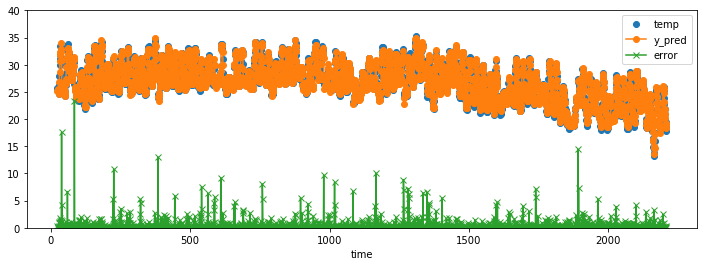

In [107]:
plt.figure(figsize=(12, 4))
df["temp"].plot(marker="o", ls="")
df["y_pred"].plot(marker="o", ls="-")
df["error"].plot(marker="x", ls="-")
plt.ylim([0, 40])
plt.xlabel("time")
plt.legend(["temp", "y_pred", "error"])

## 誤差大となる日時を確認

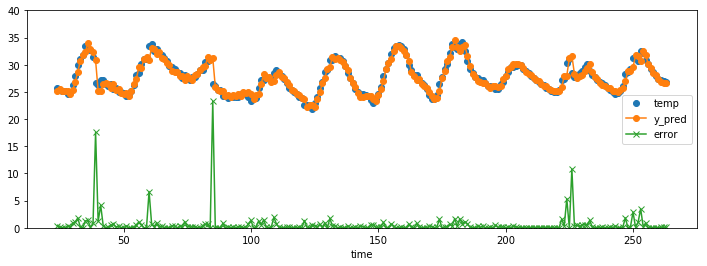

In [108]:
plt.figure(figsize=(12, 4))
df["temp"][0:24*10].plot(marker="o", ls="")
df["y_pred"][0:24*10].plot(marker="o", ls="-")
df["error"][0:24*10].plot(marker="x", ls="-")
plt.ylim([0, 40])
plt.xlabel("time")
plt.legend(["temp", "y_pred", "error"])

In [109]:
df.sort_values("error",ascending=False)[:10]

temp    x1    x2    x3    x4    x5    x6    x7    x8    x9    ...      \
85    26.4  31.1  30.6  30.5  29.0  29.0  28.3  27.8  27.7  27.1    ...       
39    26.6  31.5  32.7  32.9  33.5  31.7  31.1  30.0  27.9  26.2    ...       
1891  26.8  23.4  23.4  23.5  23.2  23.7  23.4  23.4  23.8  22.1    ...       
385   24.7  28.6  28.3  28.4  29.1  29.9  30.0  30.4  30.4  32.0    ...       
226   28.4  31.1  30.3  27.3  27.1  25.4  24.9  25.0  25.2  25.5    ...       
1167  26.4  29.7  30.1  30.3  28.7  26.1  26.8  26.0  26.1  25.6    ...       
979   28.2  31.9  32.5  32.6  32.9  33.4  32.8  32.4  32.0  31.3    ...       
610   32.8  29.8  28.4  27.8  27.4  26.7  26.4  26.4  26.4  26.4    ...       
1265  27.7  31.4  32.0  32.8  31.7  31.3  30.2  30.7  30.0  29.4    ...       
1018  30.3  27.4  28.5  27.3  26.5  25.7  25.5  25.5  25.5  25.4    ...       

       x17   x18   x19   x20   x21   x22   x23   x24     y_pred      error  
85    29.7  30.6  31.2  31.7  32.1  32.9  32.5  33.9  31.224255  23.273436  
39    25.8  26.1  26.4  28.1  29.1  30.1  30.6  30.7  30.788804  17.546079  
1891  18.9  18.9  18.7  18.8  18.7  18.7  18.7  18.8  23.001063  14.431925  
385   29.7  28.5  27.4  26.7  26.0  26.1  26.4  26.3  28.309768  13.030424  
226   28.5  28.9  29.3  29.9  29.9  29.7  29.5  29.5  31.689483  10.820701  
1167  26.8  27.0  27.2  27.7  28.5  29.8  30.6  31.3  29.567885  10.035492  
979   27.7  27.7  28.2  27.7  29.0  28.7  29.4  30.1  31.313661   9.694883  
610   26.3  26.0  26.6  26.5  26.6  27.5  29.3  30.0  29.762069   9.229025  
1265  26.7  26.8  27.1  27.3  28.0  28.4  29.0  29.9  30.671895   8.832160  
1018  25.9  26.4  28.1  28.7  29.0  27.8  28.8  29.3  27.411455   8.343691  

[10 rows x 27 columns]

2017/7/4 13:00:00	31.1 -> 2017/7/4 14:00:00	26.4

2017/7/2 15:00:00	31.5-> 2017/7/2 16:00:00	26.6

2017/9/17 19:00:00	23.4 -> 2017/9/17 20:00:00	26.8  => +3.4 / 37219

2017/7/17 1:00:00	28.6 -> 2017/7/17 2:00:00	24.7

2017/7/10 10:00:00	31.1 ->2017/7/10 11:00:00	28.4

2017/7/26 10:00:00	29.8 -> 2017/7/26 11:00:00	32.8 => +3.0 / 35938

(0, 40)

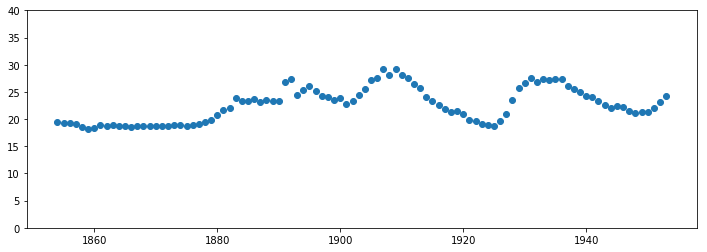

In [110]:
plt.figure(figsize=(12, 4))
df["temp"][1830:1930].plot(marker="o", ls="")
plt.ylim([0, 40])

(0, 40)

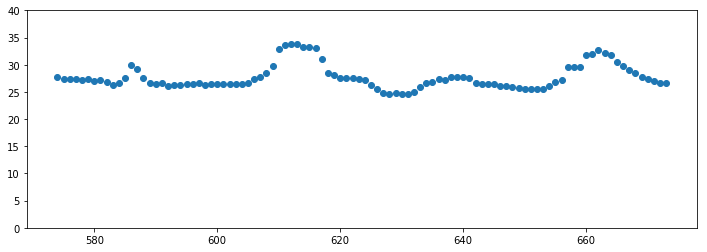

In [111]:
plt.figure(figsize=(12, 4))
df["temp"][550:650].plot(marker="o", ls="")
plt.ylim([0, 40])

+ 確かに約３℃/Hrで上昇しており異常といえる

（課題）湿度も自己回帰モデルを作成するとして、気温と湿度それぞれの異常度を出すのではなく、組み合わせの異常度を出すようにしたい

# 混合ガウス分布

WBGT＝0.735×Ta＋0.0374×RH＋0.00292×Ta×RH＋7.619×SR－4.557×SR2－0.0572×WS－4.064

Taは気温（℃）、RHは相対湿度（％）、SRは全天日射量kW/m2)、WSは平均風速(m/s)

*1  小野雅司ら(2014)：通常観測気象要素を用いたWBGTの推定．日生気誌，50(4)，147-157.

In [112]:
df7n=df2017[df2017['place']=='nagoya']

In [113]:
ta = df7n["temp"]
ws = df7n["wind_speed"]
sr = df7n["solar_radiation"]
rh = df7n["relative_humidity"]

wbgt = 0.735 * ta + 0.0374 * rh + 0.00292 * ta * rh + 7.619 * sr - 4.557 * sr**2 - 0.0572 * ws - 4.064

In [114]:
wbgt = pd.DataFrame(wbgt, columns=["wbgt"])
df7nw = pd.concat([df7n,wbgt],axis=1)
df7nw.describe()

temp   wind_speed  solar_radiation  relative_humidity  \
count  2208.000000  2208.000000      2208.000000        2208.000000   
mean     26.643886     2.805525         0.690675          69.479167   
std       3.510730     1.594632         0.939578          15.122952   
min      13.200000     0.100000         0.000000          24.000000   
25%      24.600000     1.700000         0.000000          58.000000   
50%      26.700000     2.500000         0.110000          70.000000   
75%      29.000000     3.700000         1.260000          81.000000   
max      35.200000    15.400000         3.660000          96.000000   

              wbgt  
count  2208.000000  
mean     22.360849  
std       5.483527  
min      -9.083837  
25%      20.231814  
50%      23.870001  
75%      25.628427  
max      31.010760

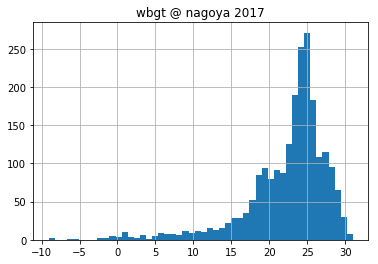

In [117]:
plt.hist(df7nw["wbgt"],bins=50)
plt.grid()
plt.title("wbgt @ nagoya 2017")
plt.show()

複数の分布が重なっているようにも見える→ガウス分布の重ね合わせで表現できないか
→１次元混合正規分布のEM法により背景雑音（異常）を取り除く
→実装は検討中

以下未対応。。。。。

# 近傍法
（入力のみ　＆　時系列＋時系列以外）

# 局所外れ値度（LOF）
（入力のみ＆時系列以外）

# 疎構造学習
（入力のみ　＆　時系列＋時系列以外）

# 自己符号化器
（入力のみ＆時系列以外）

# アイソレーションフォレスト
（入力のみ＆時系列以外）

# ナイーブベイズ
（入力のみ＆時系列以外）

# 密度比推定
（入力のみ＆時系列以外）

# 線形回帰

# ワンクラスSVM
（入力のみ＆時系列以外）

# 主成分分析
（入力のみ＆時系列以外）

# カーネル回帰

# SVR

# ガウス過程

# RNN

# 部分空間法
（入力のみ＆時系列）

# 状態空間モデル